In [1]:
import matplotlib.pyplot as matplt
import matplotlib.image as matimg
import numpy as np
from scipy.misc import imresize

%matplotlib inline

import os
from os import listdir
from os.path import isfile , join
import shutil
import stat
import collections
from collections import defaultdict

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets


In [1]:
#VP Debate n Tweets
import pandas as pd
# We create a pandas dataframe as follows:
data = pd.read_csv('2019debates_knime.csv')

# We display the first 10 elements of the dataframe:
display(data.head(10))

,row ID,Tweet,Tweet ID,Time,Favorited,Retweeted,Is Favourited,Is Retweeted,Is Retweet,Retweet from,...,User - Description,User - URL,User - Creation time,User - Language,User - Location,User - Time Zone,User - Statuses,User - Followers,User - Friends,User - Favourites
0,Row0,RT @voiceofnigeria: Rate the candidates. Who p...,1074756819648688130,2018-12-17 21:02:48,0,511,False,False,True,voiceofnigeria,...,NaN,https://t.co/TUem8j2kKW,2012-05-05 14:33:31,en,NaN,NaN,727,26,163,777
1,Row1,RT @Maybeks: Nigeria produces 90% of the rice ...,1074756517742764032,2018-12-17 21:01:36,0,305,False,False,True,Maybeks,...,Daughter of The Lord God that dwelleth in Zion...,https://t.co/AueR9fcilp,2011-06-19 20:15:36,en,Jesus leads and i follow.,NaN,814,98,180,2321
2,Row2,RT @SKSolaKuti: Video: How @channelstv team ri...,1074756241530982400,2018-12-17 21:00:30,0,157,False,False,True,SKSolaKuti,...,Golden Jubile District @Rotaract Rep. @Rotary ...,https://t.co/Xw7pBQasgq,2012-10-18 07:56:50,en,Nigeria,NaN,174042,3186,227,40434
3,Row3,RT @AWTambuwal: Nigeria needs a Vice President...,1074755425516642304,2018-12-17 20:57:16,0,1914,False,False,True,AWTambuwal,...,#GGMU ⚽️🛑,NaN,2018-04-05 20:19:41,en,"Plateau, Nigeria",NaN,4148,152,339,260
4,Row4,#2019Debate#PeterObi superb,1074755342993682432,2018-12-17 20:56:56,0,0,False,False,False,NaN,...,NaN,NaN,2018-12-17 20:33:01,en,NaN,NaN,1,0,2,0
5,Row5,RT @thesignalng: FLASH | @PeterObi Defeats @Pr...,1074754923219349504,2018-12-17 20:55:16,0,485,False,False,True,thesignalng,...,Never Give Up,NaN,2016-06-09 03:55:54,en,"Lagos, Nigeria",NaN,2199,149,660,66
6,Row6,RT @AWTambuwal: Watching the #VPDebate I can a...,1074754814028996609,2018-12-17 20:54:50,0,2255,False,False,True,AWTambuwal,...,"Brought up in a poor background, hard working ...",NaN,2017-06-13 00:17:38,en,"Jalingo, Nigeria",NaN,961,366,634,22342
7,Row7,RT @KakaakiSocial: This morning on #KakaakiSoc...,1074754328181772289,2018-12-17 20:52:54,0,72,False,False,True,KakaakiSocial,...,NaN,NaN,2018-11-11 07:17:07,en,NaN,NaN,7,2,23,25
8,Row8,RT @channelstv: We are producing 90% of the ri...,1074753241869639680,2018-12-17 20:48:35,0,544,False,False,True,channelstv,...,Reader. Learner. Lover. Christian.,NaN,2018-11-24 12:10:02,en,"Lagos, Nigeria",NaN,38,15,91,15
9,Row9,RT @renoomokri: Information reaching me is tha...,1074753238946193409,2018-12-17 20:48:34,0,1040,False,False,True,renoomokri,...,favlinks concept Ltd is an eloquent firm that ...,https://t.co/MQFxbMFBim,2017-07-06 15:23:20,en,"Abuja, Nigeria",NaN,571,58,411,1379


In [6]:
# Internal methods of a single tweet object:
print(dir(data['Tweet']))

['T', '_AXIS_ALIASES', '_AXIS_IALIASES', '_AXIS_LEN', '_AXIS_NAMES', '_AXIS_NUMBERS', '_AXIS_ORDERS', '_AXIS_REVERSED', '_AXIS_SLICEMAP', '__abs__', '__add__', '__and__', '__array__', '__array_prepare__', '__array_priority__', '__array_wrap__', '__bool__', '__bytes__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__div__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__long__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdiv__', '__reduce__

In [9]:
data.columns

Index(['row ID', 'Tweet', 'Tweet ID', 'Time', 'Favorited', 'Retweeted',
       'Is Favourited', 'Is Retweeted', 'Is Retweet', 'Retweet from',
       'Latitude', 'Longitude', 'Country', 'User', 'User - Name', 'User - ID',
       'User - Description', 'User - URL', 'User - Creation time',
       'User - Language', 'User - Location', 'User - Time Zone',
       'User - Statuses', 'User - Followers', 'User - Friends',
       'User - Favourites'],
      dtype='object')

In [10]:
# Stub for helpers
# convert utc to est
def convertUTCtoFull(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('dddd, MMM D, YYYY h:mm A')

# convert to year
def convertUTCtoYear(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('YYYY')

# convert to month
def convertUTCtoMonth(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('MM')

# convert to year-month
def convertUTCtoYearMonth(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('YYYY-MM')

# convert to day
def convertUTCtoDay(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('D')

# convert to month/day
def convertUTCtoMonthDay(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('YYYY-MM-DD')

# convert to day of week
def convertUTCtoDayOfWeek(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('d')

# convert to time
def convertUTCtoHourOfDay(date):
    utc = arrow.get(date)
    return int(utc.to('US/Eastern').format('HH'))

# convert to week of year
def convertUTCtoWeekNumber(date):
    return int(date.strftime('%U'))

# convert to year + week of year
def convertUTCtoYearWeekNumber(date):
    utc = arrow.get(date)
    year = utc.to('US/Eastern').format('YYYY')
    weekno = int(date.strftime('%U'))
    return str(year) + '-' + str(weekno).zfill(2)
#     return int(str(year) + str(weekno).zfill(2))

# Strip HTML
def stripHTML(html):
    tree = ET.fromstring(html)
    return ET.tostring(tree, encoding='utf8', method='text')

# Encode with closest thing to character
def encodeText(line):
    line = unicodedata.normalize('NFKD', line).encode('ascii','ignore')
    return line

In [14]:
data['created_at'] = pd.to_datetime(data['Time'])
#tweets['d'] = tweets['Id']
data.Tweet.fillna(data.Tweet, inplace=True)

In [18]:
data['human_date'] = data['created_at'].apply(convertUTCtoFull)
data['month/day'] = data['created_at'].apply(convertUTCtoMonthDay)
data['year'] = data['created_at'].apply(convertUTCtoYear)
data['month'] = data['created_at'].apply(convertUTCtoMonth)
data['year_month'] = data['created_at'].apply(convertUTCtoYearMonth)
data['day'] = data['created_at'].apply(convertUTCtoDay)
data['day of week'] = data['created_at'].apply(convertUTCtoDayOfWeek)
data['hour'] = data['created_at'].apply(convertUTCtoHourOfDay)
data['week'] = data['created_at'].apply(convertUTCtoWeekNumber) 
data['year_week'] = data['created_at'].apply(convertUTCtoYearWeekNumber)
#data['text_encoded'] = data['text'].apply(encodeText)
data.set_index('created_at', inplace=True)

data.head()

,row ID,Tweet,Tweet ID,Time,Favorited,Retweeted,Is Favourited,Is Retweeted,Is Retweet,Retweet from,...,human_date,month/day,year,month,year_month,day,day of week,hour,week,year_week
created_at,,,,,,,,,,,,,,,,,,,,,
2018-12-17 21:02:48,Row0,RT @voiceofnigeria: Rate the candidates. Who p...,1074756819648688130,2018-12-17 21:02:48,0,511,False,False,True,voiceofnigeria,...,"Monday, Dec 17, 2018 4:02 PM",2018-12-17,2018,12,2018-12,17,1,16,50,2018-50
2018-12-17 21:01:36,Row1,RT @Maybeks: Nigeria produces 90% of the rice ...,1074756517742764032,2018-12-17 21:01:36,0,305,False,False,True,Maybeks,...,"Monday, Dec 17, 2018 4:01 PM",2018-12-17,2018,12,2018-12,17,1,16,50,2018-50
2018-12-17 21:00:30,Row2,RT @SKSolaKuti: Video: How @channelstv team ri...,1074756241530982400,2018-12-17 21:00:30,0,157,False,False,True,SKSolaKuti,...,"Monday, Dec 17, 2018 4:00 PM",2018-12-17,2018,12,2018-12,17,1,16,50,2018-50
2018-12-17 20:57:16,Row3,RT @AWTambuwal: Nigeria needs a Vice President...,1074755425516642304,2018-12-17 20:57:16,0,1914,False,False,True,AWTambuwal,...,"Monday, Dec 17, 2018 3:57 PM",2018-12-17,2018,12,2018-12,17,1,15,50,2018-50
2018-12-17 20:56:56,Row4,#2019Debate#PeterObi superb,1074755342993682432,2018-12-17 20:56:56,0,0,False,False,False,NaN,...,"Monday, Dec 17, 2018 3:56 PM",2018-12-17,2018,12,2018-12,17,1,15,50,2018-50


In [16]:
!pip install agate
!pip install vaderSentiment
!pip install arrow

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
Cache entry deserialization failed, entry ignored
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [17]:
import agate
import warnings
import requests
import zipfile
import io
import json
import unicodedata
import arrow


/home/ahmed/anaconda3/lib/python3.7/site-packages/socks.py:58: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working


In [13]:
data['source'].value_counts()

Twitter for Android       1504
Twitter for iPhone         341
Twitter Lite               102
Twitter Web Client          59
Mobile Web (M2)             15
Twitter for iPad            14
Facebook                     6
Twitter for BlackBerry       5
TweetDeck                    2
Hootsuite Inc.               1
Instagram                    1
UberSocial for Android       1
Name: source, dtype: int64

In [19]:
data

,row ID,Tweet,Tweet ID,Time,Favorited,Retweeted,Is Favourited,Is Retweeted,Is Retweet,Retweet from,...,human_date,month/day,year,month,year_month,day,day of week,hour,week,year_week
created_at,,,,,,,,,,,,,,,,,,,,,
2018-12-17 21:02:48,Row0,RT @voiceofnigeria: Rate the candidates. Who p...,1074756819648688130,2018-12-17 21:02:48,0,511,False,False,True,voiceofnigeria,...,"Monday, Dec 17, 2018 4:02 PM",2018-12-17,2018,12,2018-12,17,1,16,50,2018-50
2018-12-17 21:01:36,Row1,RT @Maybeks: Nigeria produces 90% of the rice ...,1074756517742764032,2018-12-17 21:01:36,0,305,False,False,True,Maybeks,...,"Monday, Dec 17, 2018 4:01 PM",2018-12-17,2018,12,2018-12,17,1,16,50,2018-50
2018-12-17 21:00:30,Row2,RT @SKSolaKuti: Video: How @channelstv team ri...,1074756241530982400,2018-12-17 21:00:30,0,157,False,False,True,SKSolaKuti,...,"Monday, Dec 17, 2018 4:00 PM",2018-12-17,2018,12,2018-12,17,1,16,50,2018-50
2018-12-17 20:57:16,Row3,RT @AWTambuwal: Nigeria needs a Vice President...,1074755425516642304,2018-12-17 20:57:16,0,1914,False,False,True,AWTambuwal,...,"Monday, Dec 17, 2018 3:57 PM",2018-12-17,2018,12,2018-12,17,1,15,50,2018-50
2018-12-17 20:56:56,Row4,#2019Debate#PeterObi superb,1074755342993682432,2018-12-17 20:56:56,0,0,False,False,False,NaN,...,"Monday, Dec 17, 2018 3:56 PM",2018-12-17,2018,12,2018-12,17,1,15,50,2018-50
2018-12-17 20:55:16,Row5,RT @thesignalng: FLASH | @PeterObi Defeats @Pr...,1074754923219349504,2018-12-17 20:55:16,0,485,False,False,True,thesignalng,...,"Monday, Dec 17, 2018 3:55 PM",2018-12-17,2018,12,2018-12,17,1,15,50,2018-50
2018-12-17 20:54:50,Row6,RT @AWTambuwal: Watching the #VPDebate I can a...,1074754814028996609,2018-12-17 20:54:50,0,2255,False,False,True,AWTambuwal,...,"Monday, Dec 17, 2018 3:54 PM",2018-12-17,2018,12,2018-12,17,1,15,50,2018-50
2018-12-17 20:52:54,Row7,RT @KakaakiSocial: This morning on #KakaakiSoc...,1074754328181772289,2018-12-17 20:52:54,0,72,False,False,True,KakaakiSocial,...,"Monday, Dec 17, 2018 3:52 PM",2018-12-17,2018,12,2018-12,17,1,15,50,2018-50
2018-12-17 20:48:35,Row8,RT @channelstv: We are producing 90% of the ri...,1074753241869639680,2018-12-17 20:48:35,0,544,False,False,True,channelstv,...,"Monday, Dec 17, 2018 3:48 PM",2018-12-17,2018,12,2018-12,17,1,15,50,2018-50


In [20]:
train = pd.read_csv('2019debates_knime.csv')

In [21]:
train.describe()

,Tweet ID,Favorited,Retweeted,Latitude,Longitude,User - ID,User - Time Zone,User - Statuses,User - Followers,User - Friends,User - Favourites
count,9.596000e+03,9596.000000,9596.000000,5.000000,5.000000,9.596000e+03,0.0,9.596000e+03,9596.000000,9596.000000,9596.000000
mean,1.074302e+18,0.245519,1163.754273,5.770573,7.715149,3.115084e+17,NaN,1.973959e+04,1640.449041,1144.693414,7385.184243
std,1.698744e+14,9.074296,1760.514922,1.806047,0.499153,4.468579e+17,NaN,5.026907e+04,10908.634495,4464.131058,16855.957358
min,1.074074e+18,0.000000,0.000000,4.832365,7.053223,9.934122e+06,NaN,1.000000e+00,0.000000,0.000000,0.000000
25%,1.074183e+18,0.000000,70.000000,4.941829,7.382812,3.523259e+08,NaN,7.425000e+02,93.000000,177.000000,273.000000
50%,1.074255e+18,0.000000,433.000000,5.038279,7.904663,1.943927e+09,NaN,4.087500e+03,332.000000,489.000000,1602.000000
75%,1.074388e+18,0.000000,1245.000000,5.042725,7.907410,8.531266e+17,NaN,1.751925e+04,972.000000,1172.250000,6075.000000
max,1.074757e+18,730.000000,6971.000000,8.997670,8.327637,1.074749e+18,NaN,1.125837e+06,733930.000000,365526.000000,320973.000000


In [22]:
train.columns

Index(['row ID', 'Tweet', 'Tweet ID', 'Time', 'Favorited', 'Retweeted',
       'Is Favourited', 'Is Retweeted', 'Is Retweet', 'Retweet from',
       'Latitude', 'Longitude', 'Country', 'User', 'User - Name', 'User - ID',
       'User - Description', 'User - URL', 'User - Creation time',
       'User - Language', 'User - Location', 'User - Time Zone',
       'User - Statuses', 'User - Followers', 'User - Friends',
       'User - Favourites'],
      dtype='object')

<b>Number of Words</b></br>
One of the most basic features we can extract is the number of words in each tweet. The basic intuition behind this is that generally, the negative sentiments contain a lesser amount of words than the positive ones.

To do this, we simply use the split function in python:

In [23]:
train['word_count'] = train['Tweet'].apply(lambda x: len(str(x).split(" ")))
train[['Tweet','word_count']].head()

,Tweet,word_count
0,RT @voiceofnigeria: Rate the candidates. Who p...,16
1,RT @Maybeks: Nigeria produces 90% of the rice ...,21
2,RT @SKSolaKuti: Video: How @channelstv team ri...,14
3,RT @AWTambuwal: Nigeria needs a Vice President...,21
4,#2019Debate#PeterObi superb,2


<b>Number of characters</b></br>
This feature is also based on the previous feature intuition. Here, we calculate the number of characters in each tweet. This is done by calculating the length of the tweet.

In [24]:
train['char_count'] = train['Tweet'].str.len() ## this also includes spaces
train[['Tweet','char_count']].head()

,Tweet,char_count
0,RT @voiceofnigeria: Rate the candidates. Who p...,119
1,RT @Maybeks: Nigeria produces 90% of the rice ...,140
2,RT @SKSolaKuti: Video: How @channelstv team ri...,129
3,RT @AWTambuwal: Nigeria needs a Vice President...,140
4,#2019Debate#PeterObi superb,27


In [25]:
train[['Tweet','char_count','word_count']].head()

,Tweet,char_count,word_count
0,RT @voiceofnigeria: Rate the candidates. Who p...,119,16
1,RT @Maybeks: Nigeria produces 90% of the rice ...,140,21
2,RT @SKSolaKuti: Video: How @channelstv team ri...,129,14
3,RT @AWTambuwal: Nigeria needs a Vice President...,140,21
4,#2019Debate#PeterObi superb,27,2


<b>Average Word Length</b></br>
We will also extract another feature which will calculate the average word length of each tweet. This can also potentially help us in improving our model.

Here, we simply take the sum of the length of all the words and divide it by the total length of the tweet

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9596 entries, 0 to 9595
Data columns (total 28 columns):
row ID                  9596 non-null object
Tweet                   9596 non-null object
Tweet ID                9596 non-null int64
Time                    9596 non-null object
Favorited               9596 non-null int64
Retweeted               9596 non-null int64
Is Favourited           9596 non-null bool
Is Retweeted            9596 non-null bool
Is Retweet              9596 non-null bool
Retweet from            9017 non-null object
Latitude                5 non-null float64
Longitude               5 non-null float64
Country                 32 non-null object
User                    9596 non-null object
User - Name             9594 non-null object
User - ID               9596 non-null int64
User - Description      7785 non-null object
User - URL              2174 non-null object
User - Creation time    9596 non-null object
User - Language         9596 non-null object
User - Lo

In [29]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

train['avg_word'] = train['Tweet'].apply(lambda x: avg_word(x))
train[['Tweet','avg_word']].head()

,Tweet,avg_word
0,RT @voiceofnigeria: Rate the candidates. Who p...,6.933333
1,RT @Maybeks: Nigeria produces 90% of the rice ...,5.272727
2,RT @SKSolaKuti: Video: How @channelstv team ri...,8.285714
3,RT @AWTambuwal: Nigeria needs a Vice President...,5.666667
4,#2019Debate#PeterObi superb,13.000000


<b>Number of stopwords</b></br>
Generally, while solving an NLP problem, the first thing we do is to remove the stopwords. But sometimes calculating the number of stopwords can also give us some extra information which we might have been losing before.

Here, we have imported stopwords from NLTK, which is a basic NLP library in python.



In [30]:
import nltk
nltk.download('stopwords')

/home/ahmed/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
/home/ahmed/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
/home/ahmed/anaconda3/lib/python3.7/site-packages/nltk/decorators.py:70: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
/home/ahmed/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
/home/ahmed/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
/home/ahmed/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __packag

[nltk_data] Downloading package stopwords to /home/ahmed/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

train['stopwords'] = train['Tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
train[['Tweet','stopwords']].head()

/home/ahmed/anaconda3/lib/python3.7/site-packages/nltk/corpus/reader/wordlist.py:28: ResourceWarning: unclosed file <_io.BufferedReader name='/home/ahmed/nltk_data/corpora/stopwords/english'>


,Tweet,stopwords
0,RT @voiceofnigeria: Rate the candidates. Who p...,3
1,RT @Maybeks: Nigeria produces 90% of the rice ...,5
2,RT @SKSolaKuti: Video: How @channelstv team ri...,1
3,RT @AWTambuwal: Nigeria needs a Vice President...,4
4,#2019Debate#PeterObi superb,0


<b>Number of special characters</b></br>
One more interesting feature which we can extract from a tweet is calculating the number of hashtags or mentions present in it. This also helps in extracting extra information from our text data.

Here, we make use of the ‘starts with’ function because hashtags (or mentions) always appear at the beginning of a word.

In [33]:
train['hastags'] = train['Tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
train[['Tweet','hastags']].head()

,Tweet,hastags
0,RT @voiceofnigeria: Rate the candidates. Who p...,2
1,RT @Maybeks: Nigeria produces 90% of the rice ...,1
2,RT @SKSolaKuti: Video: How @channelstv team ri...,1
3,RT @AWTambuwal: Nigeria needs a Vice President...,0
4,#2019Debate#PeterObi superb,1


<b>Number of numerics</b></br>
Just like we calculated the number of words, we can also calculate the number of numerics which are present in the tweets. It does not have a lot of use in our example, but this is still a useful feature that should be run while doing similar exercises. For example, 

In [34]:
train['numerics'] = train['Tweet'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
train[['Tweet','numerics']].head()

,Tweet,numerics
0,RT @voiceofnigeria: Rate the candidates. Who p...,0
1,RT @Maybeks: Nigeria produces 90% of the rice ...,0
2,RT @SKSolaKuti: Video: How @channelstv team ri...,0
3,RT @AWTambuwal: Nigeria needs a Vice President...,0
4,#2019Debate#PeterObi superb,0


<b>Number of Uppercase words</b></br>
Anger or rage is quite often expressed by writing in UPPERCASE words which makes this a necessary operation to identify those words.

In [35]:
train['upper'] = train['Tweet'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
train[['Tweet','upper']].head()

,Tweet,upper
0,RT @voiceofnigeria: Rate the candidates. Who p...,1
1,RT @Maybeks: Nigeria produces 90% of the rice ...,1
2,RT @SKSolaKuti: Video: How @channelstv team ri...,1
3,RT @AWTambuwal: Nigeria needs a Vice President...,1
4,#2019Debate#PeterObi superb,0


### Describe Number of Hashtags Used 

In [36]:
train['hastags'].describe()

count    9596.000000
mean        0.805752
std         1.100472
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max        11.000000
Name: hastags, dtype: float64

In [37]:
train['hastags'].head()

0    2
1    1
2    1
3    0
4    1
Name: hastags, dtype: int64

/home/ahmed/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2347: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
/home/ahmed/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2364: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working


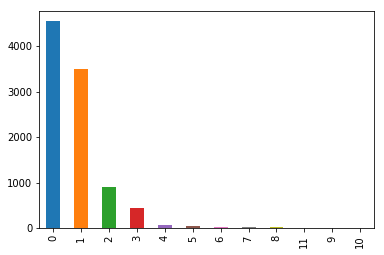

In [38]:
train['hastags'].value_counts().plot(kind='bar')

In [39]:
train['hastags'].value_counts()

0     4558
1     3491
2      914
3      443
4       59
5       41
6       34
7       30
8       16
11       5
9        4
10       1
Name: hastags, dtype: int64

In [41]:
hashtag_list_v2 = []     #CREATE EMPTY LIST 
for i in train.Tweet:           #LOOP OVER ITEMS IN 'S'
    hashtag = filter(lambda x: x.startswith('#'),i.split()) 
    hashtag = map(lambda x: x.strip('/;,-.:!?"''()'),hashtag)  ##remove the indicated punctuations
    hashtag = map(lambda x: x.strip(),hashtag)    #STRIP REMOVES 
    hashtag = map(lambda x: x.lower(),hashtag)    #IF WE WANT LOWER CASE TAGS (OTHERWISE, COUNT IS CASE SENSITIVE)
    hashtag_list_v2.extend(hashtag)  
print (len(hashtag_list_v2))
hashtag_list_v2[:20]

7732


['#2019elections',
 '#2019debate',
 '#factcheck',
 '#2019debate',
 '#2019debate#peterobi',
 '#2019debate',
 '#vpdebate',
 '#kakaakisocial',
 '#2019debate',
 '#2019debate',
 '#kakaakisocial',
 '#2019debate',
 '#kakaakisocial',
 '#2019debate',
 '#2019debate',
 '#201…',
 '#2019elections',
 '#2019debate',
 '#2019debate',
 '#2019elections']

OK, we now have our list. Every hashtag in our dataset is included in this list. It has 33,195 elements (hashtags). Now how can we get a count for each hashtag? By using value_counts() ! We can perform pure Python operations on this list, but in order to use the value_counts() function, which is a PANDAS feature, we need to first convert it to a PANDAS Series object. In the code below we thus convert the list to a PANDAS series and then run value_counts().

In [42]:
df = pd.DataFrame(hashtag_list_v2)

In [43]:
df.rename(columns = {1: 'hastags'}, inplace = True)

In [44]:
df.rename(columns = {list(df)[0]: 'tag'}, inplace = True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7732 entries, 0 to 7731
Data columns (total 1 columns):
tag    7732 non-null object
dtypes: object(1)
memory usage: 60.5+ KB


In [46]:
df.head()

,tag
0,#2019elections
1,#2019debate
2,#factcheck
3,#2019debate
4,#2019debate#peterobi


In [47]:
df.sort_values(by='tag')

,tag
5513,#
5382,#
3398,#01indonesiamaju
3383,#01indonesiamaju
3374,#01indonesiamaju
3381,#01jokowilagi
3396,#01jokowilagi
3372,#01jokowilagi
1038,#100bestwaystochill
539,#100bestwaystochill


In [48]:
tags = " ".join(tweet for tweet in df.tag)
print ("There are {} words in the combination of all review.".format(len(tags)))

There are 85652 words in the combination of all review.


In [49]:
from matplotlib import*
import matplotlib.pyplot as plt

/home/ahmed/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
/home/ahmed/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
/home/ahmed/anaconda3/lib/python3.7/site-packages/wordcloud/wordcloud.py:30: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/ahmed/anaconda3/lib/python3.7/site-packages/wordcloud/stopwords' mode='r' encoding='UTF-8'>


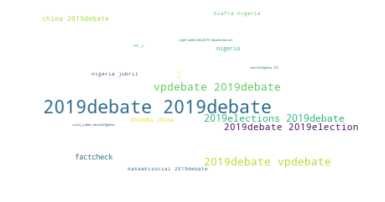

In [50]:
# Create stopword list:
#stopwords = set(STOPWORDS)
#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Generate a word cloud image
#wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
wordcloud = WordCloud(background_color="white").generate(tags)


# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [110]:
# Save the image in the img folder:
wordcloud.to_file("2019debate.png")

In [108]:
top_N = 5
#if not necessary all lower
a = df['tag'].str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
print (word_dist)


rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)

<FreqDist with 607 samples and 15785 outcomes>
            Word  Frequency
0              #       7733
1     2019debate       3427
2           201…        575
3       vpdebate        529
4  2019elections        350


In [51]:
hashtag_list_v2[:5]

['#2019elections',
 '#2019debate',
 '#factcheck',
 '#2019debate',
 '#2019debate#peterobi']

## Basic Preprocessing

Basic Pre-processing
So far, we have learned how to extract basic features from text data. Before diving into text and feature extraction, our first step should be cleaning the data in order to obtain better features. We will achieve this by doing some of the basic pre-processing steps on our training data.

So, let’s get into it.

## Basic Text Pre-processing of text data
<ol>
<li>Lower casing</li>
<li>Punctuation removal</li>
<li>Stopwords removal</li>
<li>Frequent words removal</li>
<li>Rare words removal</li>
<li>Spelling correction</li>
<li>Tokenization</li>
<li>Stemming</li>
<li>Lemmatization</li>
</ol>

<b>1. Lower case</b></br>
The first pre-processing step which we will do is transform our tweets into lower case. This avoids having multiple copies of the same words. For example, while calculating the word count, ‘Analytics’ and ‘analytics’ will be taken as different words.

In [52]:
train['Tweet2'] = train['Tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
train['Tweet2'].head()

0    rt @voiceofnigeria: rate the candidates. who p...
1    rt @maybeks: nigeria produces 90% of the rice ...
2    rt @sksolakuti: video: how @channelstv team ri...
3    rt @awtambuwal: nigeria needs a vice president...
4                          #2019debate#peterobi superb
Name: Tweet2, dtype: object

<b>2. Removing Punctuation</b></br>
The next step is to remove punctuation, as it doesn’t add any extra information while treating text data. Therefore removing all instances of it will help us reduce the size of the training data.

In [53]:
train['Tweet2'] = train['Tweet'].str.replace('[^\w\s]','')
train['Tweet2'].head()

<input>:1: DeprecationWarning: invalid escape sequence \w
<input>:1: DeprecationWarning: invalid escape sequence \w
<input>:1: DeprecationWarning: invalid escape sequence \w
<ipython-input-53-2fec7912e367>:1: DeprecationWarning: invalid escape sequence \w


0    RT voiceofnigeria Rate the candidates Who perf...
1    RT Maybeks Nigeria produces 90 of the rice we ...
2    RT SKSolaKuti Video How channelstv team rigged...
3    RT AWTambuwal Nigeria needs a Vice President l...
4                            2019DebatePeterObi superb
Name: Tweet2, dtype: object

<b>3. Removal of Stop Words</b></br>
As we discussed earlier, stop words (or commonly occurring words) should be removed from the text data. For this purpose, we can either create a list of stopwords ourselves or we can use predefined libraries.

In [54]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
train['Tweet2'] = train['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
train['Tweet2'].head()

/home/ahmed/anaconda3/lib/python3.7/site-packages/nltk/corpus/reader/wordlist.py:28: ResourceWarning: unclosed file <_io.BufferedReader name='/home/ahmed/nltk_data/corpora/stopwords/english'>


0    RT @voiceofnigeria: Rate candidates. Who perfo...
1    RT @Maybeks: Nigeria produces 90% rice consume...
2    RT @SKSolaKuti: Video: How @channelstv team ri...
3    RT @AWTambuwal: Nigeria needs Vice President l...
4                          #2019Debate#PeterObi superb
Name: Tweet2, dtype: object

<b>4. Common word removal</b></br>
Previously, we just removed commonly occurring words in a general sense. We can also remove commonly occurring words from our text data First, let’s check the 10 most frequently occurring words in our text data then take call to remove or retain.

In [55]:
freq = pd.Series(' '.join(train['Tweet2']).split()).value_counts()[:10]
freq

RT               9042
#2019Debate      2666
Peter            2001
I                1788
Obi              1722
Vice             1542
@PeterObi        1512
Nigeria          1379
fight            1191
@ProfOsinbajo    1088
dtype: int64

Now, let’s remove these words as their presence will not of any use in classification of our text data.

In [56]:
freq = list(freq.index)
train['Tweet2'] = train['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train['Tweet2'].head()

0    @voiceofnigeria: Rate the candidates. Who perf...
1    @Maybeks: produces 90% of the rice we consume ...
2    @SKSolaKuti: Video: How @channelstv team rigge...
3    @AWTambuwal: needs a President like Obi. Well ...
4                          #2019Debate#PeterObi superb
Name: Tweet2, dtype: object

<b>5. Rare words removal</b></br>
Similarly, just as we removed the most common words, this time let’s remove rarely occurring words from the text. Because they’re so rare, the association between them and other words is dominated by noise. You can replace rare words with a more general form and then this will have higher counts

In [57]:
freq = pd.Series(' '.join(train['Tweet2']).split()).value_counts()[-10:]
freq

https://t.co/BLvMbIK6jM    1
https://t.co/1oayvRLwsQ    1
Important.                 1
consumes.                  1
Image                      1
Quran                      1
@_olayinka                 1
@zedekboss:                1
https://t.co/xbwSlXBAhN    1
#goldcoin                  1
dtype: int64

In [58]:
freq = list(freq.index)
train['Tweet2'] = train['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train['Tweet2'].head()


0    RT @voiceofnigeria: Rate the candidates. Who p...
1    RT @Maybeks: Nigeria produces 90% of the rice ...
2    RT @SKSolaKuti: Video: How @channelstv team ri...
3    RT @AWTambuwal: Nigeria needs a Vice President...
4                          #2019Debate#PeterObi superb
Name: Tweet2, dtype: object

<b>6. Spelling correction</b></br>
We’ve all seen tweets with a plethora of spelling mistakes. Our timelines are often filled with hastly sent tweets that are barely legible at times.

In that regard, spelling correction is a useful pre-processing step because this also will help us in reducing multiple copies of words. For example, “Analytics” and “analytcs” will be treated as different words even if they are used in the same sense.

To achieve this we will use the textblob library. If you are not familiar with it, you can check my previous article on ‘NLP for beginners using textblob’.

In [59]:
from textblob import TextBlob
train['Tweet2'][:5].apply(lambda x: str(TextBlob(x).correct()))

/home/ahmed/anaconda3/lib/python3.7/site-packages/textblob/_text.py:1330: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/ahmed/anaconda3/lib/python3.7/site-packages/textblob/en/en-spelling.txt' mode='r' encoding='utf-8'>


0    of @voiceofnigeria: Late the candidates. Who p...
1    of @Maybeks: Siberia produces 90% of the rice ...
2    of @SKSolaKuti: Video: Now @channels team rigg...
3    of @AWTambuwal: Siberia needs a Vice President...
4                          #2019Debate#PeterObi superb
Name: Tweet2, dtype: object

<i>Note</i></br> that it will actually take a lot of time to make these corrections. Therefore, just for the purposes of learning, I have shown this technique by applying it on only the first 5 rows. Moreover, we cannot always expect it to be accurate so some care should be taken before applying it.

We should also keep in mind that words are often used in their abbreviated form. For instance, ‘your’ is used as ‘ur’. We should treat this before the spelling correction step, otherwise these words might be transformed into any other word like the one shown below:

<b>7. Tokenization</b></br>
Tokenization refers to dividing the text into a sequence of words or sentences. In our example, we have used the textblob library to first transform our tweets into a blob and then converted them into a series of words.



In [60]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ahmed/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [61]:
from textblob import TextBlob
TextBlob(train['Tweet2'][1]).words

WordList(['RT', 'Maybeks', 'Nigeria', 'produces', '90', 'of', 'the', 'rice', 'we', 'consume', 'Osinbajo', 'Lies', 'lies', 'lies', 'FactCheck', '“', 'Nigeria', 'is', 'the', 'second', 'highest', 'import…'])

<b>8. Stemming</b></br>
Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach. For this purpose, we will use PorterStemmer from the NLTK library.

In [62]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
train['Tweet2'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    RT @voiceofnigeria: rate the candidates. who p...
1    RT @maybeks: nigeria produc 90% of the rice we...
2    RT @sksolakuti: video: how @channelstv team ri...
3    RT @awtambuwal: nigeria need a vice presid lik...
4                          #2019debate#peterobi superb
Name: Tweet2, dtype: object

In the above output, presenting has been transformed into present, among other changes.

<b>9. Lemmatization</b></br>
Lemmatization is a more effective option than stemming because it converts the word into its root word, rather than just stripping the suffices. It makes use of the vocabulary and does a morphological analysis to obtain the root word. Therefore, we usually prefer using lemmatization over stemming.

In [63]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/ahmed/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [64]:
from textblob import Word
train['Tweet2'] = train['Tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
train['Tweet2'].head()

/home/ahmed/anaconda3/lib/python3.7/site-packages/nltk/corpus/reader/wordnet.py:1107: ResourceWarning: unclosed file <_io.BufferedReader name='/home/ahmed/nltk_data/corpora/wordnet/lexnames'>
/home/ahmed/anaconda3/lib/python3.7/site-packages/nltk/corpus/reader/wordnet.py:1159: ResourceWarning: unclosed file <_io.BufferedReader name='/home/ahmed/nltk_data/corpora/wordnet/index.adj'>
/home/ahmed/anaconda3/lib/python3.7/site-packages/nltk/corpus/reader/wordnet.py:1159: ResourceWarning: unclosed file <_io.BufferedReader name='/home/ahmed/nltk_data/corpora/wordnet/index.adv'>
/home/ahmed/anaconda3/lib/python3.7/site-packages/nltk/corpus/reader/wordnet.py:1159: ResourceWarning: unclosed file <_io.BufferedReader name='/home/ahmed/nltk_data/corpora/wordnet/index.noun'>
/home/ahmed/anaconda3/lib/python3.7/site-packages/nltk/corpus/reader/wordnet.py:1159: ResourceWarning: unclosed file <_io.BufferedReader name='/home/ahmed/nltk_data/corpora/wordnet/index.verb'>
/home/ahmed/anaconda3/lib/python3.

0    RT @voiceofnigeria: Rate the candidates. Who p...
1    RT @Maybeks: Nigeria produce 90% of the rice w...
2    RT @SKSolaKuti: Video: How @channelstv team ri...
3    RT @AWTambuwal: Nigeria need a Vice President ...
4                          #2019Debate#PeterObi superb
Name: Tweet2, dtype: object

## SENTIMENT ANALYSIS
https://leightley.com/sentiment-analysis-of-thameslink-tweets-using-python/


## Sorting

In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9596 entries, 0 to 9595
Data columns (total 34 columns):
row ID                  9596 non-null object
Tweet                   9596 non-null object
Tweet ID                9596 non-null int64
Time                    9596 non-null object
Favorited               9596 non-null int64
Retweeted               9596 non-null int64
Is Favourited           9596 non-null bool
Is Retweeted            9596 non-null bool
Is Retweet              9596 non-null bool
Retweet from            9017 non-null object
Latitude                5 non-null float64
Longitude               5 non-null float64
Country                 32 non-null object
User                    9596 non-null object
User - Name             9594 non-null object
User - ID               9596 non-null int64
User - Description      7785 non-null object
User - URL              2174 non-null object
User - Creation time    9596 non-null object
User - Language         9596 non-null object
User - Lo

In [67]:
train.sort_values(by='Retweeted')

,row ID,Tweet,Tweet ID,Time,Favorited,Retweeted,Is Favourited,Is Retweeted,Is Retweet,Retweet from,...,User - Friends,User - Favourites,word_count,char_count,avg_word,stopwords,hastags,numerics,upper,Tweet2
7732,Row7732,2018 UPDATE! SHROUD OF TURIN REVEALS SECRETS |...,1074166765264007168,2018-12-16 05:58:08,2,0,False,False,False,NaN,...,49094,41657,16,132,7.312500,0,0,1,10,2018 UPDATE! SHROUD OF TURIN REVEALS SECRETS |...
3070,Row3070,@GetsoUmma @KMoghaluTrain @MoghaluKingsley @KM...,1074343536949104640,2018-12-16 17:40:34,2,0,False,False,False,NaN,...,117,173,9,136,14.000000,0,0,0,0,@GetsoUmma @KMoghaluTrain @MoghaluKingsley @KM...
3045,Row3045,@chucktodd @RoyBlunt A Stealth Bomber costs $3...,1074345581227716608,2018-12-16 17:48:41,1,0,False,False,False,NaN,...,264,2354,19,139,5.950000,4,0,0,3,@chucktodd @RoyBlunt A Stealth Bomber cost $30...
3017,Row3017,@PremiumTimesng poll. Who won the debate #2019...,1074347444303998976,2018-12-16 17:56:05,0,0,False,False,False,NaN,...,65,55,9,90,9.111111,2,2,0,0,@PremiumTimesng poll. Who won the debate #2019...
3012,Row3012,#2019Debate,1074347519273025536,2018-12-16 17:56:23,0,0,False,False,False,NaN,...,0,8,1,11,11.000000,0,1,0,0,#2019Debate
3008,Row3008,The #2019Debate was in a way kind of tricky an...,1074347576466595840,2018-12-16 17:56:37,2,0,False,False,False,NaN,...,3794,4066,22,139,5.363636,8,1,0,0,The #2019Debate wa in a way kind of tricky and...
3003,Row3003,"Buhari (and his hypocrisy, double standards an...",1074347880973041664,2018-12-16 17:57:49,0,0,False,False,False,NaN,...,39144,5033,19,140,6.421053,7,0,0,0,"Buhari (and his hypocrisy, double standard and..."
2990,Row2990,APC Oooooooooooo!!!! \n\n#Debate \n#2019Debate...,1074348698283446277,2018-12-16 18:01:04,0,0,False,False,False,NaN,...,287,27,5,72,12.800000,0,3,0,1,APC Oooooooooooo!!!! #Debate #2019Debate #vice...
2961,Row2961,4/5 It is good to note from the #2019Debate th...,1074350060853374976,2018-12-16 18:06:29,1,0,False,False,False,NaN,...,487,488,20,139,6.000000,8,1,0,0,4/5 It is good to note from the #2019Debate th...
2926,Row2926,I wonder why Nigerian politicians find it impo...,1074353327406747648,2018-12-16 18:19:28,0,0,False,False,False,NaN,...,207,736,18,139,6.777778,6,0,0,1,I wonder why Nigerian politician find it impos...


In [71]:
train.columns

Index(['row ID', 'Tweet', 'Tweet ID', 'Time', 'Favorited', 'Retweeted',
       'Is Favourited', 'Is Retweeted', 'Is Retweet', 'Retweet from',
       'Latitude', 'Longitude', 'Country', 'User', 'User - Name', 'User - ID',
       'User - Description', 'User - URL', 'User - Creation time',
       'User - Language', 'User - Location', 'User - Time Zone',
       'User - Statuses', 'User - Followers', 'User - Friends',
       'User - Favourites', 'word_count', 'char_count', 'avg_word',
       'stopwords', 'hastags', 'numerics', 'upper', 'Tweet2', 'RTs_binary'],
      dtype='object')

In [69]:
train['RTs_binary'] = np.where(train['Retweeted']==0, 0, 1)
print ("# of variables in dataframe:", len(train.columns))
print ( "# of tweets in dataframe:", len(train))
train[['Tweet2','Retweeted','RTs_binary']].head(5)

# of variables in dataframe: 35
# of tweets in dataframe: 9596


,Tweet2,Retweeted,RTs_binary
0,RT @voiceofnigeria: Rate the candidates. Who p...,511,1
1,RT @Maybeks: Nigeria produce 90% of the rice w...,305,1
2,RT @SKSolaKuti: Video: How @channelstv team ri...,157,1
3,RT @AWTambuwal: Nigeria need a Vice President ...,1914,1
4,#2019Debate#PeterObi superb,0,0


In [72]:
train['favorites_binary'] = np.where(train['Favorited']==0, 0, 1)
print ("# of variables in dataframe:", len(train.columns))
print  ("# of tweets in dataframe:", len(train))
train[['Tweet2','Favorited','favorites_binary']].head(5)

# of variables in dataframe: 36
# of tweets in dataframe: 9596


,Tweet2,Favorited,favorites_binary
0,RT @voiceofnigeria: Rate the candidates. Who p...,0,0
1,RT @Maybeks: Nigeria produce 90% of the rice w...,0,0
2,RT @SKSolaKuti: Video: How @channelstv team ri...,0,0
3,RT @AWTambuwal: Nigeria need a Vice President ...,0,0
4,#2019Debate#PeterObi superb,0,0


In [73]:
# We extract the mean of lenghts
mean = np.mean(train['char_count'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 133.64349729053774


In [111]:
train.describe()

,Tweet ID,Favorited,Retweeted,Latitude,Longitude,User - ID,User - Time Zone,User - Statuses,User - Followers,User - Friends,...,word_count,char_count,avg_word,stopwords,hastags,numerics,upper,RTs_binary,favorites_binary,SA
count,9.596000e+03,9596.000000,9596.000000,5.000000,5.000000,9.596000e+03,0.0,9.596000e+03,9596.000000,9596.000000,...,9596.000000,9596.000000,9596.000000,9596.000000,9596.000000,9596.000000,9596.000000,9596.000000,9596.000000,9596.000000
mean,1.074302e+18,0.245519,1163.754273,5.770573,7.715149,3.115084e+17,NaN,1.973959e+04,1640.449041,1144.693414,...,20.555440,133.643497,5.678222,6.226136,0.805752,0.083681,1.777720,0.955190,0.023135,0.246769
std,1.698744e+14,9.074296,1760.514922,1.806047,0.499153,4.468579e+17,NaN,5.026907e+04,10908.634495,4464.131058,...,4.474577,15.903184,1.376121,3.314335,1.100472,0.309281,1.374785,0.206898,0.150339,0.674067
min,1.074074e+18,0.000000,0.000000,4.832365,7.053223,9.934122e+06,NaN,1.000000e+00,0.000000,0.000000,...,1.000000,11.000000,3.551724,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,1.074183e+18,0.000000,70.000000,4.941829,7.382812,3.523259e+08,NaN,7.425000e+02,93.000000,177.000000,...,18.000000,139.000000,4.875000,4.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,1.074255e+18,0.000000,433.000000,5.038279,7.904663,1.943927e+09,NaN,4.087500e+03,332.000000,489.000000,...,22.000000,140.000000,5.130435,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,1.074388e+18,0.000000,1245.000000,5.042725,7.907410,8.531266e+17,NaN,1.751925e+04,972.000000,1172.250000,...,24.000000,140.000000,6.050000,8.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000
max,1.074757e+18,730.000000,6971.000000,8.997670,8.327637,1.074749e+18,NaN,1.125837e+06,733930.000000,365526.000000,...,31.000000,194.000000,23.000000,15.000000,11.000000,3.000000,25.000000,1.000000,1.000000,1.000000


In [77]:
# We extract the tweets which were the most favourited and retweeted
fav_max = np.max(train['Favorited'])
rt_max  = np.max(train['Retweeted'])

fav = train[train.Favorited == fav_max].index[0]
rt  = train[train.Retweeted == rt_max].index[0]

# Max favorited
print("The tweet with more likes is: \n{}".format(train['Tweet2'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(train['char_count'][fav]))
print("{} characters.\n".format(train['Time'][fav]))
# Max retweet


print("The tweet with more retweets is: \n{}".format(train['Tweet2'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(train['char_count'][rt]))
print("{} characters.\n".format(train['Time'][rt]))

The tweet with more likes is: 
FLASH | @PeterObi Defeats @ProfOsinbajo in Online Polls on Vice Presidential Debate #2019Debate… https://t.co/v17ko5jb2t
Number of likes: 730
120 characters.

2018-12-16 23:14:50 characters.

The tweet with more retweets is: 
RT @atiku: I watched with pride a @PeterObi laid out our vision to get Nigeria working again. Can’t wait for the presidential debate. #201…
Number of retweets: 6971
140 characters.

2018-12-16 19:15:32 characters.



In [82]:
# We create time series by using length, likes and retweets 
tlen = pd.Series(data=train['char_count'].values, index=train['Time'])
tfav = pd.Series(data=train['Favorited'].values, index=train['Time'])
tret = pd.Series(data=train['Retweeted'].values, index=train['Time'])

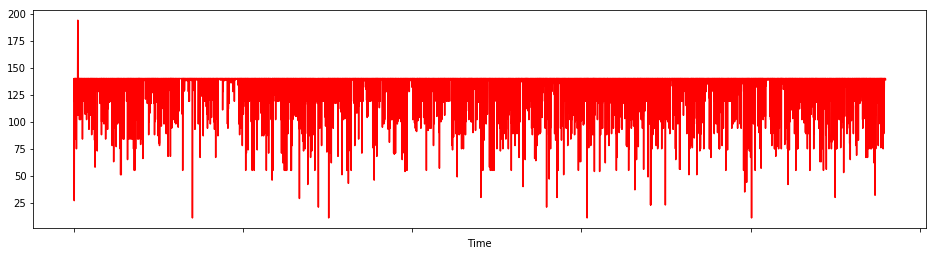

In [83]:
# Lenghts using time
tlen.plot(figsize=(16,4), color='r');

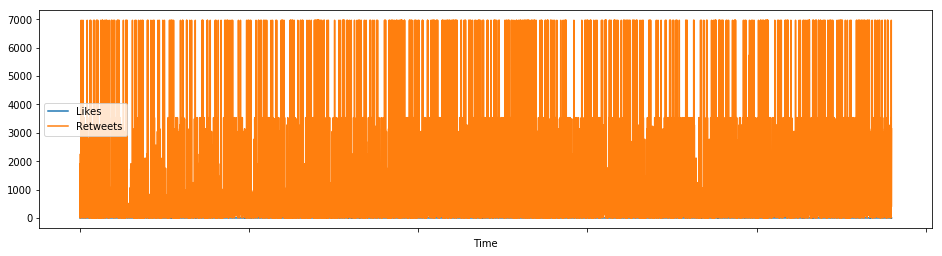

In [84]:
#And to plot the likes versus the retweets in the same chart:
# Likes vs retweets plot
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

# Pie charts of sources
The next part is to explore how Tweets are being made, as not every Tweet is sent from the same source. We do this by using the source variable.

In [77]:
# We obtain all possible sources from the data
sources = []
for source in train['source']:
    if source not in sources:
        sources.append(source)

# We print the source list
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for Android
* Twitter for iPhone
* Hootsuite Inc.
* Twitter Web Client
* Twitter Lite
* UberSocial for Android
* Mobile Web (M2)
* TweetDeck
* Twitter for iPad
* Twitter for BlackBerry
* Facebook
* Instagram


In [78]:
train['source'].value_counts()

Twitter for Android       1504
Twitter for iPhone         341
Twitter Lite               102
Twitter Web Client          59
Mobile Web (M2)             15
Twitter for iPad            14
Facebook                     6
Twitter for BlackBerry       5
TweetDeck                    2
Hootsuite Inc.               1
Instagram                    1
UberSocial for Android       1
Name: source, dtype: int64

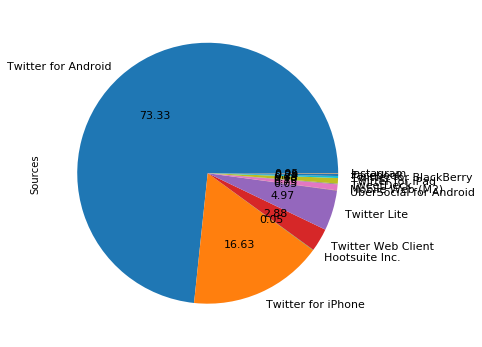

In [79]:
# We create a numpy vector and map it to the labels
percent = np.zeros(len(sources))

for source in train['source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Render the pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

## Sentiment analysis
We can use TextBlob library to perform sentiment analysis. We use the re library, which uses regular expressions. This is performed in two stages:

Clean the Tweets which means that any symbol distinct to an alphanumeric value will be re-mapped into a new value;
Create the classifier to assess the popularity of each.
This is achieved as follows.

In [86]:
from textblob import TextBlob      #Import NLP package
import re                          #Import re for regex

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a Tweet by removing 
    links and special characters using regex re.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility TextBlob to classify the polarity of a Tweet
    using TextBlob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

<input>:9: DeprecationWarning: invalid escape sequence \w
<input>:9: DeprecationWarning: invalid escape sequence \w
<input>:9: DeprecationWarning: invalid escape sequence \w
<ipython-input-86-2ae436ff6b43>:9: DeprecationWarning: invalid escape sequence \w


The TextBlob comes pre-packaged with a trained classifier, which means you do not need to train, code or label any data (you can if you want to…). The TextBlob library has been designed to work with different machine learning algorithms (I’ll be posting more about this in future), and can be inter-linked with other data science and NLP packages.

When you pass each Tweet to the classifier, it assesses the sentiment as positive, negative or neutral. Once a score has been defined, a new column is created in the DataFrame.

In [87]:
# We create a column populated with the sentiment score
train['SA'] = np.array([ analize_sentiment(tweet) for tweet in train['Tweet2'] ])

# We display the DataFrame with updated score
display(train.head(10))

,row ID,Tweet,Tweet ID,Time,Favorited,Retweeted,Is Favourited,Is Retweeted,Is Retweet,Retweet from,...,char_count,avg_word,stopwords,hastags,numerics,upper,Tweet2,RTs_binary,favorites_binary,SA
0,Row0,RT @voiceofnigeria: Rate the candidates. Who p...,1074756819648688130,2018-12-17 21:02:48,0,511,False,False,True,voiceofnigeria,...,119,6.933333,3,2,0,1,RT @voiceofnigeria: Rate the candidates. Who p...,1,0,1
1,Row1,RT @Maybeks: Nigeria produces 90% of the rice ...,1074756517742764032,2018-12-17 21:01:36,0,305,False,False,True,Maybeks,...,140,5.272727,5,1,0,1,RT @Maybeks: Nigeria produce 90% of the rice w...,1,0,0
2,Row2,RT @SKSolaKuti: Video: How @channelstv team ri...,1074756241530982400,2018-12-17 21:00:30,0,157,False,False,True,SKSolaKuti,...,129,8.285714,1,1,0,1,RT @SKSolaKuti: Video: How @channelstv team ri...,1,0,0
3,Row3,RT @AWTambuwal: Nigeria needs a Vice President...,1074755425516642304,2018-12-17 20:57:16,0,1914,False,False,True,AWTambuwal,...,140,5.666667,4,0,0,1,RT @AWTambuwal: Nigeria need a Vice President ...,1,0,1
4,Row4,#2019Debate#PeterObi superb,1074755342993682432,2018-12-17 20:56:56,0,0,False,False,False,NaN,...,27,13.000000,0,1,0,0,#2019Debate#PeterObi superb,0,0,1
5,Row5,RT @thesignalng: FLASH | @PeterObi Defeats @Pr...,1074754923219349504,2018-12-17 20:55:16,0,485,False,False,True,thesignalng,...,140,7.294118,2,1,0,2,RT @thesignalng: FLASH | @PeterObi Defeats @Pr...,1,0,0
6,Row6,RT @AWTambuwal: Watching the #VPDebate I can a...,1074754814028996609,2018-12-17 20:54:50,0,2255,False,False,True,AWTambuwal,...,140,5.086957,8,1,0,2,RT @AWTambuwal: Watching the #VPDebate I can a...,1,0,1
7,Row7,RT @KakaakiSocial: This morning on #KakaakiSoc...,1074754328181772289,2018-12-17 20:52:54,0,72,False,False,True,KakaakiSocial,...,140,6.050000,6,2,0,2,RT @KakaakiSocial: This morning on #KakaakiSoc...,1,0,0
8,Row8,RT @channelstv: We are producing 90% of the ri...,1074753241869639680,2018-12-17 20:48:35,0,544,False,False,True,channelstv,...,140,4.035714,13,0,0,2,RT @channelstv: We are producing 90% of the ri...,1,0,0
9,Row9,RT @renoomokri: Information reaching me is tha...,1074753238946193409,2018-12-17 20:48:34,0,1040,False,False,True,renoomokri,...,140,6.050000,8,1,0,1,RT @renoomokri: Information reaching me is tha...,1,0,0


As we can see, the last column contains the sentiment score (SA).

## Analysing the results
In this post, I will provide a top-level summary of the results (I'll provide more details in a future post). This will be a percentage of the number of positive, negative or neutral Tweets.

In [88]:
# We determine the score for the Tweet
pos_tweets = [ tweet for index, tweet in enumerate(train['Tweet2']) if train['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(train['Tweet2']) if train['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(train['Tweet2']) if train['SA'][index] < 0]

# We print percentages
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(train['Tweet2'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(train['Tweet2'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(train['Tweet2'])))

Percentage of positive tweets: 38.099208003334724%
Percentage of neutral tweets: 48.47853272196749%
Percentage of negative tweets: 13.42225927469779%


## try vader analyzer

In [89]:
!pip install vaderSentiment

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [58]:
tweet = []
number_favourites = []
vs_compound = []
vs_pos = []
vs_neu = []
vs_neg = []

In [59]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

for i in range(0, len(train)):
    tweet.append(train[i]['text'])
    number_favourites.append(train[i]['favorite_count'])
    vs_compound.append(analyzer.polarity_scores(train[i]['text'])['compound'])
    vs_pos.append(analyzer.polarity_scores(train[i]['text'])['pos'])
    vs_neu.append(analyzer.polarity_scores(train[i]['text'])['neu'])
    vs_neg.append(analyzer.polarity_scores(train[i]['text'])['neg'])

KeyError: 0

## Advance Text Processing
Up to this point, we have done all the basic pre-processing steps in order to clean our data. Now, we can finally move on to extracting features using NLP techniques.

<B>Advance Text Processing</B>
<ol>
<li>N-grams</li>
<li>Term Frequency</li>
<li>Inverse Document Frequency</li>
<li>Term Frequency-Inverse Document Frequency (TF-IDF)</li>
<li>Bag of Words</li>
<li>Sentiment Analysis</li>
    <li>Word Embedding</li>


<b>1. N-grams</b></br>
N-grams are the combination of multiple words used together. Ngrams with N=1 are called unigrams. Similarly, bigrams (N=2), trigrams (N=3) and so on can also be used.

Unigrams do not usually contain as much information as compared to bigrams and trigrams. The basic principle behind n-grams is that they capture the language structure, like what letter or word is likely to follow the given one. The longer the n-gram (the higher the n), the more context you have to work with. Optimum length really depends on the application – if your n-grams are too short, you may fail to capture important differences. On the other hand, if they are too long, you may fail to capture the “general knowledge” and only stick to particular cases.

So, let’s quickly extract bigrams from our tweets using the ngrams function of the textblob library.

In [90]:
TextBlob(train['Tweet2'][0]).ngrams(2)

[WordList(['RT', 'voiceofnigeria']),
 WordList(['voiceofnigeria', 'Rate']),
 WordList(['Rate', 'the']),
 WordList(['the', 'candidates']),
 WordList(['candidates', 'Who']),
 WordList(['Who', 'performed']),
 WordList(['performed', 'best']),
 WordList(['best', 'at']),
 WordList(['at', 'the']),
 WordList(['the', 'Vice']),
 WordList(['Vice', 'presidential']),
 WordList(['presidential', 'debate']),
 WordList(['debate', '2019Elections']),
 WordList(['2019Elections', '2019Debate'])]

<b>2. Term frequency</b></br>
Term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence.

Therefore, we can generalize term frequency as:

<b></br>TF = (Number of times term T appears in the particular row) / (number of terms in that row)</b></br>



Below, I have tried to show you the term frequency table of a tweet.

In [91]:
tf1 = (train['Tweet2'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,the,2
1,rice,1
2,import…,1
3,lie,1
4,“Nigeria,1
5,Osinbajo,1
6,we,1
7,Lies,1
8,90%,1
9,Nigeria,1


More about Term Frequency https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/

<b>3. Inverse Document Frequency</b></br>
The intuition behind inverse document frequency (IDF) is that a word is not of much use to us if it’s appearing in all the documents.

Therefore, the IDF of each word is the log of the ratio of the total number of rows to the number of rows in which that word is present.

<b>IDF = log(N/n),</b> where, N is the total number of rows and n is the number of rows in which the word was present.

So, let’s calculate IDF for the same tweets for which we calculated the term frequency.

In [92]:
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(train.shape[0]/(len(train[train['Tweet2'].str.contains(word)])))


In [93]:
tf1

,words,tf,idf
0,the,2,0.500562
1,rice,1,3.784607
2,import…,1,6.461051
3,lie,1,3.651649
4,“Nigeria,1,6.335888
5,Osinbajo,1,1.475620
6,we,1,1.663609
7,Lies,1,6.173369
8,90%,1,4.278752
9,Nigeria,1,1.466094


The more the value of IDF, the more unique is the word.

<b>4. Term Frequency – Inverse Document Frequency (TF-IDF)</b></br>
TF-IDF is the multiplication of the TF and IDF which we calculated above.

In [94]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,the,2,0.500562,1.001123
1,rice,1,3.784607,3.784607
2,import…,1,6.461051,6.461051
3,lie,1,3.651649,3.651649
4,“Nigeria,1,6.335888,6.335888
5,Osinbajo,1,1.475620,1.475620
6,we,1,1.663609,1.663609
7,Lies,1,6.173369,6.173369
8,90%,1,4.278752,4.278752
9,Nigeria,1,1.466094,1.466094


We can see that the TF-IDF has penalized words like ‘make’, ‘life’, and ‘member’ because they are commonly occurring words. However, it has given a high weight to “imbibed” since that will be very useful in determining the sentiment of the tweet.

We don’t have to calculate TF and IDF every time beforehand and then multiply it to obtain TF-IDF. Instead, sklearn has a separate function to directly obtain it:

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(train['Tweet2'])

train_vect


/home/ahmed/anaconda3/lib/python3.7/site-packages/numpy/matrixlib/defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
/home/ahmed/anaconda3/lib/python3.7/site-packages/numpy/matrixlib/defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.


<9596x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 107644 stored elements in Compressed Sparse Row format>

<b>5. Bag of Words</b></br>
Bag of Words (BoW) refers to the representation of text which describes the presence of words within the text data. The intuition behind this is that two similar text fields will contain similar kind of words, and will therefore have a similar bag of words. Further, that from the text alone we can learn something about the meaning of the document.

For implementation, sklearn provides a separate function for it as shown below:

In [96]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
train_bow = bow.fit_transform(train['Tweet2'])
train_bow

/home/ahmed/anaconda3/lib/python3.7/site-packages/numpy/matrixlib/defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
/home/ahmed/anaconda3/lib/python3.7/site-packages/numpy/matrixlib/defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.


<9596x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 166528 stored elements in Compressed Sparse Row format>

To gain a better understanding of this https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/

<b>6. Sentiment Analysis</b></br>
If you recall, our problem was to detect the sentiment of the tweet. So, before applying any ML/DL models (which can have a separate feature detecting the sentiment using the textblob library), let’s check the sentiment of the first few tweets.

In [97]:
train['Tweet2'][:5].apply(lambda x: TextBlob(x).sentiment)

0    (1.0, 0.3)
1    (0.0, 0.0)
2    (0.0, 0.0)
3    (0.4, 0.4)
4    (1.0, 1.0)
Name: Tweet2, dtype: object

Above, you can see that it returns a tuple representing polarity and subjectivity of each tweet. Here, we only extract polarity as it indicates the sentiment as value nearer to 1 means a positive sentiment and values nearer to -1 means a negative sentiment. This can also work as a feature for building a machine learning model.

In [94]:
train['sentiment'] = train['text'].apply(lambda x: TextBlob(x).sentiment[0] )
train[['text','sentiment']].head()

,text,sentiment
0,mr remembered word us statistic drunken man us...,0.000000
1,the_jonathanian put best foot forward yemi osi...,1.000000
2,mr_jags flash candidate saint peterobi quickly...,-0.022917
3,hedankwambo presidential candidate obi perform...,0.200000
4,jackobinyan pity beg confusing micromanagement...,-0.200000


In [152]:

pd.pivot_table(train,index=["User"],values=["word_count"],aggfunc=np.sum)

,word_count
User,
AbujaMFA,5717
CCBNigeria,379
CIVILDEFENDERS,15478
CopyrightComm,1213
DMONigeria,6910
ENACTUSFUDMA,7170
FMEnvng,58581
FMICNigeria,61549
FMPWH,46255


In [153]:
train.groupby('User').count()

,row ID,Tweet,Tweet ID,Time,Favorited,Retweeted,Is Favourited,Is Retweeted,Is Retweet,Retweet from,...,User - Friends,User - Favourites,word_count,char_count,avg_word,stopwords,hastags,numerics,upper,sentiment
User,,,,,,,,,,,,,,,,,,,,,
AbujaMFA,297,297,297,297,297,297,297,297,297,76,...,297,297,297,297,297,297,297,297,297,297
CCBNigeria,29,29,29,29,29,29,29,29,29,3,...,29,29,29,29,29,29,29,29,29,29
CIVILDEFENDERS,1046,1046,1046,1046,1046,1046,1046,1046,1046,4,...,1046,1046,1046,1046,1046,1046,1046,1046,1046,1046
CopyrightComm,105,105,105,105,105,105,105,105,105,1,...,105,105,105,105,105,105,105,105,105,105
DMONigeria,424,424,424,424,424,424,424,424,424,48,...,424,424,424,424,424,424,424,424,424,424
ENACTUSFUDMA,472,472,472,472,472,472,472,472,472,270,...,472,472,472,472,472,472,472,472,472,472
FMEnvng,3157,3157,3157,3157,3157,3157,3157,3157,3157,1973,...,3157,3157,3157,3157,3157,3157,3157,3157,3157,3157
FMICNigeria,3212,3212,3212,3212,3212,3212,3212,3212,3212,634,...,3212,3212,3212,3212,3212,3212,3212,3212,3212,3212
FMPWH,2252,2252,2252,2252,2252,2252,2252,2252,2252,226,...,2252,2252,2252,2252,2252,2252,2252,2252,2252,2252


In [98]:
train.columns

Index(['row ID', 'Tweet', 'Tweet ID', 'Time', 'Favorited', 'Retweeted',
       'Is Favourited', 'Is Retweeted', 'Is Retweet', 'Retweet from',
       'Latitude', 'Longitude', 'Country', 'User', 'User - Name', 'User - ID',
       'User - Description', 'User - URL', 'User - Creation time',
       'User - Language', 'User - Location', 'User - Time Zone',
       'User - Statuses', 'User - Followers', 'User - Friends',
       'User - Favourites', 'word_count', 'char_count', 'avg_word',
       'stopwords', 'hastags', 'numerics', 'upper', 'Tweet2', 'RTs_binary',
       'favorites_binary', 'SA'],
      dtype='object')

<b>7. Word Embeddings</b></br>
Word Embedding is the representation of text in the form of vectors. The underlying idea here is that similar words will have a minimum distance between their vectors.

Word2Vec models require a lot of text, so either we can train it on our training data or we can use the pre-trained word vectors developed by Google, Wiki, etc.
You can access the https://nlp.stanford.edu/projects/glove/

Here, we will use pre-trained word vectors which can be downloaded from the glove website. There are different dimensions (50,100, 200, 300) vectors trained on wiki data. For this example, I have downloaded the 100-dimensional version of the model.

You can refer an article https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/ here to understand different form of word embeddings.

The first step here is to convert it into the word2vec format.

In [99]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

/home/ahmed/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
/home/ahmed/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
/home/ahmed/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
/home/ahmed/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
/home/ahmed/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
/home/ahmed/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __

FileNotFoundError: [Errno 2] No such file or directory: 'glove.6B.100d.txt'

https://nlp.stanford.edu/projects/glove/

Now, we can load the above word2vec file as a model.

In [190]:
from gensim.models import KeyedVectors # load the Stanford GloVe model
filename = 'glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)

Let’s say our tweet contains a text saying ‘go away’. We can easily obtain it’s word vector using the above model:



In [191]:
model['go']

array([-0.078894,  0.4616  ,  0.57779 , -0.71637 , -0.13121 ,  0.4186  ,
       -0.29156 ,  0.52006 ,  0.089986, -0.35062 ,  0.51755 ,  0.51998 ,
        0.15218 ,  0.41485 , -0.12377 , -0.37222 ,  0.0273  ,  0.75673 ,
       -0.8739  ,  0.58935 ,  0.46662 ,  0.62918 ,  0.092603, -0.012868,
       -0.015169,  0.25567 , -0.43025 , -0.77668 ,  0.71449 , -0.3834  ,
       -0.69638 ,  0.23522 ,  0.11396 ,  0.02778 ,  0.071357,  0.87409 ,
       -0.1281  ,  0.063576,  0.067867, -0.50181 , -0.28523 , -0.072536,
       -0.50738 , -0.6914  , -0.53579 , -0.11361 , -0.38234 , -0.12414 ,
        0.011214, -1.1622  ,  0.037057, -0.18495 ,  0.01416 ,  0.87193 ,
       -0.097309, -2.3565  , -0.14554 ,  0.28275 ,  2.0053  ,  0.23439 ,
       -0.38298 ,  0.69539 , -0.44916 , -0.094157,  0.90527 ,  0.65764 ,
        0.27628 ,  0.30688 , -0.57781 , -0.22987 , -0.083043, -0.57236 ,
       -0.299   , -0.81112 ,  0.039752, -0.05681 , -0.48879 , -0.18091 ,
       -0.28152 , -0.20559 ,  0.4932  , -0.033999, 

In [192]:
model['away']

array([-0.10379 , -0.014792,  0.59933 , -0.51316 , -0.036463,  0.6588  ,
       -0.57906 ,  0.17819 ,  0.23663 , -0.21384 ,  0.55339 ,  0.53597 ,
        0.041444,  0.16095 ,  0.017093, -0.37242 ,  0.017974,  0.39268 ,
       -0.23265 ,  0.1818  ,  0.66405 ,  0.98163 ,  0.42339 ,  0.030581,
        0.35015 ,  0.25519 , -0.71182 , -0.42184 ,  0.13068 , -0.47452 ,
       -0.08175 ,  0.1574  , -0.13262 ,  0.22679 , -0.16885 , -0.11122 ,
       -0.32272 , -0.020978, -0.43345 ,  0.172   , -0.67366 , -0.79052 ,
        0.10556 , -0.4219  , -0.12385 , -0.063486, -0.17843 ,  0.56359 ,
        0.16986 , -0.17804 ,  0.13956 , -0.20169 ,  0.078985,  1.4497  ,
        0.23556 , -2.6014  , -0.5286  , -0.11636 ,  1.7184  ,  0.33254 ,
        0.12136 ,  1.1602  , -0.2914  ,  0.47125 ,  0.41869 ,  0.35271 ,
        0.47869 , -0.042281, -0.18294 ,  0.1796  , -0.24431 , -0.34042 ,
        0.20337 , -0.93676 ,  0.013077,  0.080339, -0.36604 , -0.44005 ,
       -0.35393 ,  0.15907 ,  0.55807 ,  0.1492  , 

We then take the average to represent the string ‘go away’ in the form of vectors having 100 dimensions.



In [ ]:
(model['go'] + model['away'])/2

In [ ]:
train.describe()

In [ ]:
train.columns

In [ ]:
train.to_csv('mda_cleaned_sentiment_new.csv')

In [ ]:
train.head()

## Wordcloud

In [ ]:
!pip install wordcloud

In [100]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [101]:
text = train.Tweet2[0]


In [102]:
wordcloud = WordCloud().generate(text)

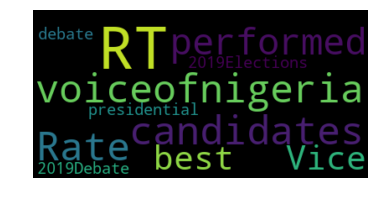

In [103]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

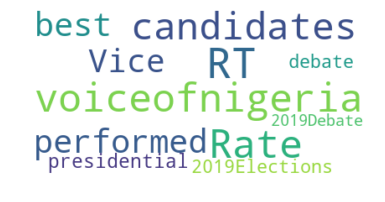

In [104]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Save the image in the img folder:
wordcloud.to_file("vpdebate.png")

In [106]:
text = " ".join(tweet for tweet in train.Tweet)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 1292038 words in the combination of all review.


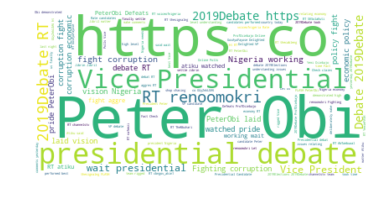

In [107]:
# Create stopword list:
#stopwords = set(STOPWORDS)
#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Generate a word cloud image
#wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
wordcloud = WordCloud(background_color="white").generate(text)


# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [112]:
# Save the image in the img folder:
wordcloud.to_file("peter_obi.png")

## Adding Date field to the Data

In [ ]:
train.info()

## Audience Reactions on Twitter

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
train.columns

In [ ]:
train.head(1)

In [ ]:
train[['Retweeted']].describe().T
#np.round(df[['retweet_count','favorite_count']].describe(), 2).T  ##ALTERNATIVE CODE IF NOT SETTING THE FLOAT FORMAT OPTION ABOVE

In [ ]:
train.columns

In [ ]:
train['RTs_binary'] = np.where(train['Retweeted']==0, 0, 1)
print ("# of variables in dataframe:", len(train.columns))
print ( "# of tweets in dataframe:", len(train))
train[['Tweet','Retweeted','RTs_binary']].head(5)

In [ ]:
train['favorites_binary'] = np.where(train['Favorited']==0, 0, 1)
print ("# of variables in dataframe:", len(train.columns))
print ("# of tweets in dataframe:", len(train))
train[['Tweet','Favorited','favorites_binary']].head(5)

### Verification

Before we actually start using our new data it is critical we verify that our data transformations worked. So let's take a couple of steps using the example of our new variable `RTs_binary`. First, we're expecting a new variable with values of only 0 or 1; `value_counts()` will let us know whether the new variable has the expected values.

In [ ]:
train['RTs_binary'].value_counts()

In [ ]:
pd.crosstab(train['favorites_binary'], train['RTs_binary']).apply(lambda r: r/r.sum(), axis=0)

In [ ]:
train.plot(kind='scatter', x='favorites_binary', y='RTs_binary')

Word Frequencies

In [114]:
top_N = 5
#if not necessary all lower
a = train['Tweet2'].str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
print (word_dist)


rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)

<FreqDist with 6349 samples and 258603 outcomes>
  Word  Frequency
0    @      14279
1    :      12616
2   rt       9065
3  the       8237
4    #       7767


In [188]:
top_N = 5
#if not necessary all lower
a = df['tag'].str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
print (word_dist)


rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)

<FreqDist with 5864 samples and 67036 outcomes>
            Word  Frequency
0              #      33248
1          nitda       1127
2            cbn       1009
3        nigeria        846
4  peptalk_ndlea        799


## Further Analysis of Text 

In [117]:
from nltk.tokenize import TweetTokenizer
from nltk.stem.porter import PorterStemmer

def tweet_tokenizer(verbatim):
    try:
        tokenizer = TweetTokenizer()
        all_tokens = tokenizer.tokenize(verbatim.lower())
        # this line filters out all tokens that are entirely non-alphabetic characters
        filtered_tokens = [t for t in all_tokens if t.islower()]
        # filter out all tokens that are <=2 chars
        filtered_tokens = [x for x in filtered_tokens if len(x)>2]
    except IndexError:
        filtered_tokens = []
    return(filtered_tokens)

In [118]:
# get the most common words in Tweets
from sklearn.feature_extraction.text import CountVectorizer

def get_frequent_terms(text_series, stop_words = None, ngram_range = (1,2)):
    '''
    Input:
       text_series: a list or series of documents
       stop_words: a list of stop_words to ignore, or the string 'english',
                   which uses a built-in stop word list for the english language.
                   By default, there are no stop words used
       ngram_range: a single int, or a 2 tuple representing the range of ngrams to count.
                    the default (1,2) counts 1- and 2- grams.
    Returns:
       a dataframe of counts, indexed by n-gram
    '''
    count_vectorizer = CountVectorizer(analyzer = "word",
                                       tokenizer = tweet_tokenizer,
                                       stop_words = stop_words, # try changing the stopword sets that we use.
                                                                # notice that many top terms are words like
                                                                # "and" and "the"
                                       ngram_range = ngram_range # you can change this to count frequencies of
                                                           # ngrams as well as single tokens
                                                           # a range of (1,2) counts 1-grams (single tokens) and
                                                           # 2-grams (2-token phrases)
                                      )
    term_freq_matrix = count_vectorizer.fit_transform(text_series)
    terms = count_vectorizer.get_feature_names()
    term_frequencies = term_freq_matrix.sum(axis = 0).tolist()[0]

    term_freq_df = (pd.DataFrame(list(zip(terms, term_frequencies)), columns = ["token","count"])
                    .set_index("token")
                    .sort_values("count",ascending = False))
    return term_freq_df


In [119]:
term_freq_df = get_frequent_terms(train["Tweet"],
                                  stop_words = "english") # stop_words = "english" removes words like 'and'

/home/ahmed/anaconda3/lib/python3.7/site-packages/numpy/matrixlib/defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
/home/ahmed/anaconda3/lib/python3.7/site-packages/numpy/matrixlib/defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
/home/ahmed/anaconda3/lib/python3.7/site-packages/numpy/matrixlib/defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
/home/ahmed/anac

In [120]:
term_freq_df.head(20)

,count
token,
#2019debate,3482
debate,2530
obi,2292
peter,2284
presidential,2161
@peterobi,2115
peter obi,2038
vice,1825
presidential debate,1744


In [124]:
term_freq_df.tail(10)

,count
token,
duri,1
duri 6that,1
durotoye erode,1
durotoye oby,1
días del,1
días resto,1
ear,1
early,1
early years,1


In [125]:
train[train['Tweet'].str.contains('Atiku Abubakar')]

,row ID,Tweet,Tweet ID,Time,Favorited,Retweeted,Is Favourited,Is Retweeted,Is Retweet,Retweet from,...,char_count,avg_word,stopwords,hastags,numerics,upper,Tweet2,RTs_binary,favorites_binary,SA
732,Row732,RT @yunusxonline: The Running mate of @Atiku A...,1074613486003593216,2018-12-17 11:33:15,0,2,False,False,True,yunusxonline,...,123,8.307692,1,2,0,1,RT @yunusxonline: The Running mate of @Atiku A...,1,0,0
5431,Row5431,RT @yunusxonline: The Running mate of @Atiku A...,1074230455392714753,2018-12-16 10:11:13,0,2,False,False,True,yunusxonline,...,123,8.307692,1,2,0,1,RT @yunusxonline: The Running mate of @Atiku A...,1,0,0
5607,Row5607,2019Debate: I Can’t Wait For Presidential Deba...,1074224635523133440,2018-12-16 09:48:05,1,0,False,False,False,NaN,...,112,9.272727,0,0,0,1,2019Debate: I Can’t Wait For Presidential Deba...,0,1,0


Who is Tweeting? Who is speaking?
I’m going to use some Pandas tricks (.groupby and .agg) to find the most commonly Tweeting users in the dataset.



In [126]:
train.columns

Index(['row ID', 'Tweet', 'Tweet ID', 'Time', 'Favorited', 'Retweeted',
       'Is Favourited', 'Is Retweeted', 'Is Retweet', 'Retweet from',
       'Latitude', 'Longitude', 'Country', 'User', 'User - Name', 'User - ID',
       'User - Description', 'User - URL', 'User - Creation time',
       'User - Language', 'User - Location', 'User - Time Zone',
       'User - Statuses', 'User - Followers', 'User - Friends',
       'User - Favourites', 'word_count', 'char_count', 'avg_word',
       'stopwords', 'hastags', 'numerics', 'upper', 'Tweet2', 'RTs_binary',
       'favorites_binary', 'SA'],
      dtype='object')

In [131]:
train[["Is Retweet","Tweet ID"]].groupby("Is Retweet").count()

,Tweet ID
Is Retweet,
False,579
True,9017
